In [2]:
import pandas as pd

df=pd.read_csv("gold_historical_data_cleaned.csv")
print(df.describe())

             Close         High          Low         Open         Volume
count  1537.000000  1537.000000  1537.000000  1537.000000    1537.000000
mean   1865.045153  1873.867599  1855.907092  1864.692908    4762.395576
std     338.518799   340.086340   336.423897   338.051482   26010.089351
min    1269.300000  1269.800000  1266.000000  1266.400000       0.000000
25%    1709.900000  1717.400000  1699.000000  1707.400000      63.000000
50%    1831.900000  1841.200000  1822.000000  1830.100000     219.000000
75%    1968.400000  1977.700000  1960.300000  1968.100000     651.000000
max    2871.600000  2889.500000  2857.800000  2865.200000  346362.000000


In [3]:
print(df.describe().round(3))

          Close      High       Low      Open      Volume
count  1537.000  1537.000  1537.000  1537.000    1537.000
mean   1865.045  1873.868  1855.907  1864.693    4762.396
std     338.519   340.086   336.424   338.051   26010.089
min    1269.300  1269.800  1266.000  1266.400       0.000
25%    1709.900  1717.400  1699.000  1707.400      63.000
50%    1831.900  1841.200  1822.000  1830.100     219.000
75%    1968.400  1977.700  1960.300  1968.100     651.000
max    2871.600  2889.500  2857.800  2865.200  346362.000


In [4]:
for col in df.columns:
    if col !="Date":
        df[col]=pd.to_numeric(df[col],errors="coerce")
        
df.dtypes        

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

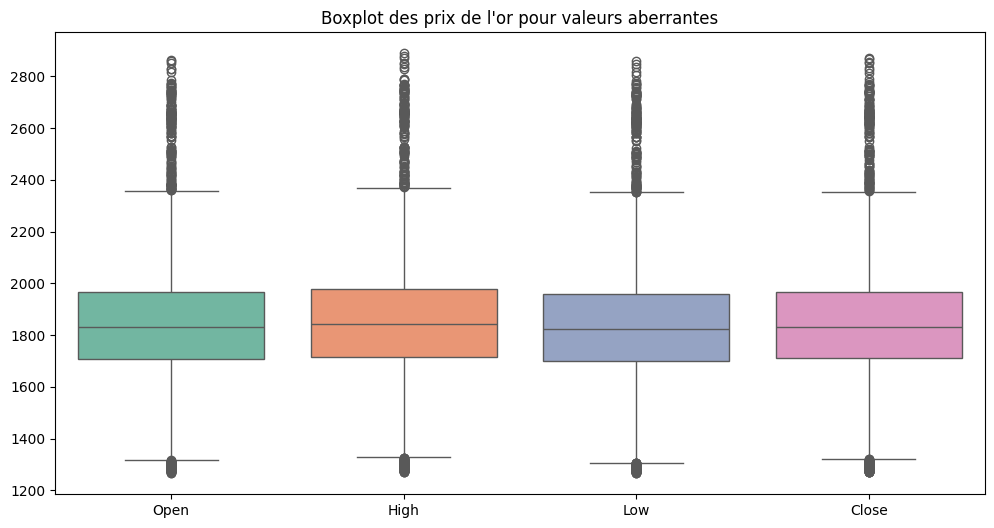

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open','High','Low','Close']], palette="Set2")
plt.title("Boxplot des prix de l'or pour valeurs aberrantes")
plt.show()

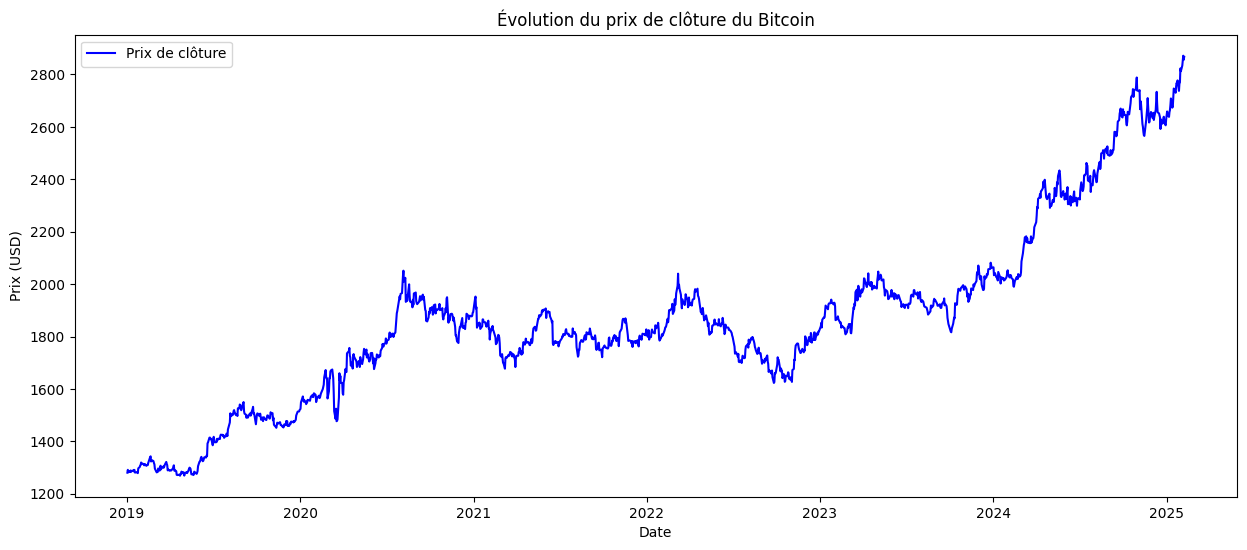

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Close"], label="Prix de clôture", color="blue")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de clôture du Bitcoin")
plt.legend()
plt.show()

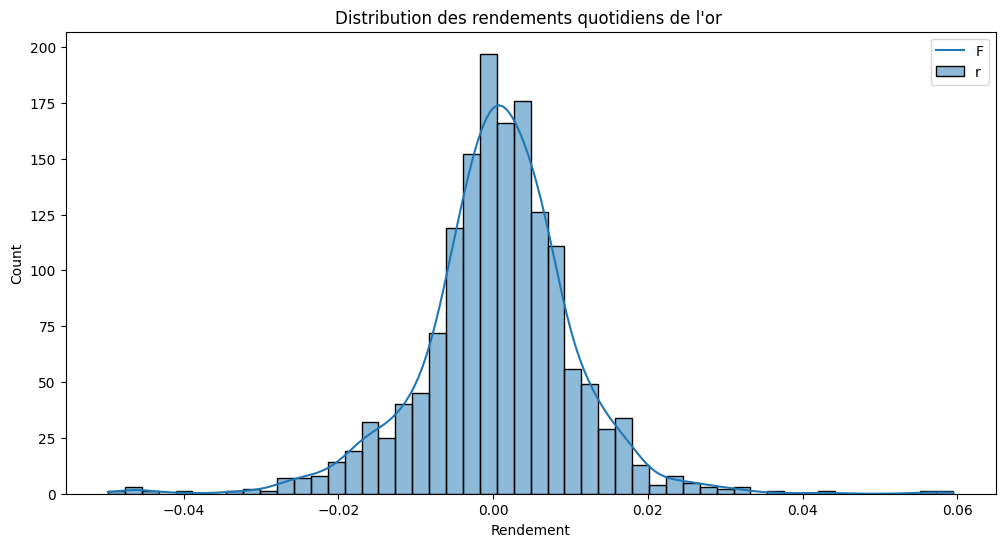

In [11]:
df['Daily Return'] = df['Close'].pct_change()
# Distribution des rendements
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50,kde=True)

plt.title("Distribution des rendements quotidiens de l'or ")
plt.xlabel('Rendement')
plt.legend('Frequence')
plt.show()

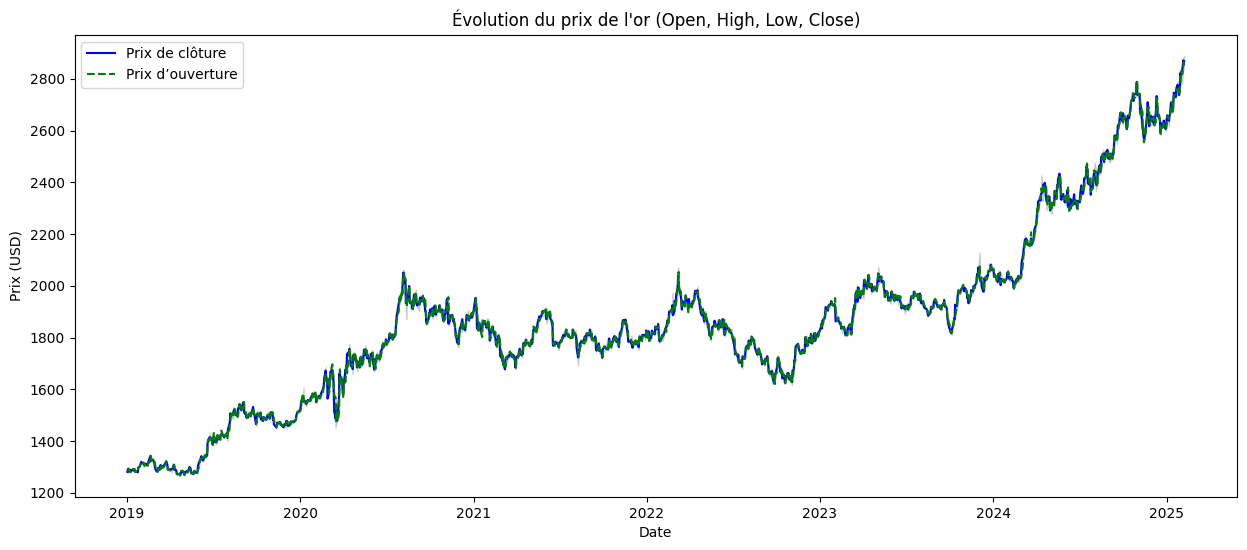

In [14]:

plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Close"], label="Prix de clôture", color="blue")
plt.plot(df["Date"], df["Open"], label="Prix d’ouverture", color="green", linestyle="dashed")
plt.fill_between(df["Date"], df["Low"], df["High"], color="gray", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de l'or (Open, High, Low, Close)")
plt.legend()
plt.show()

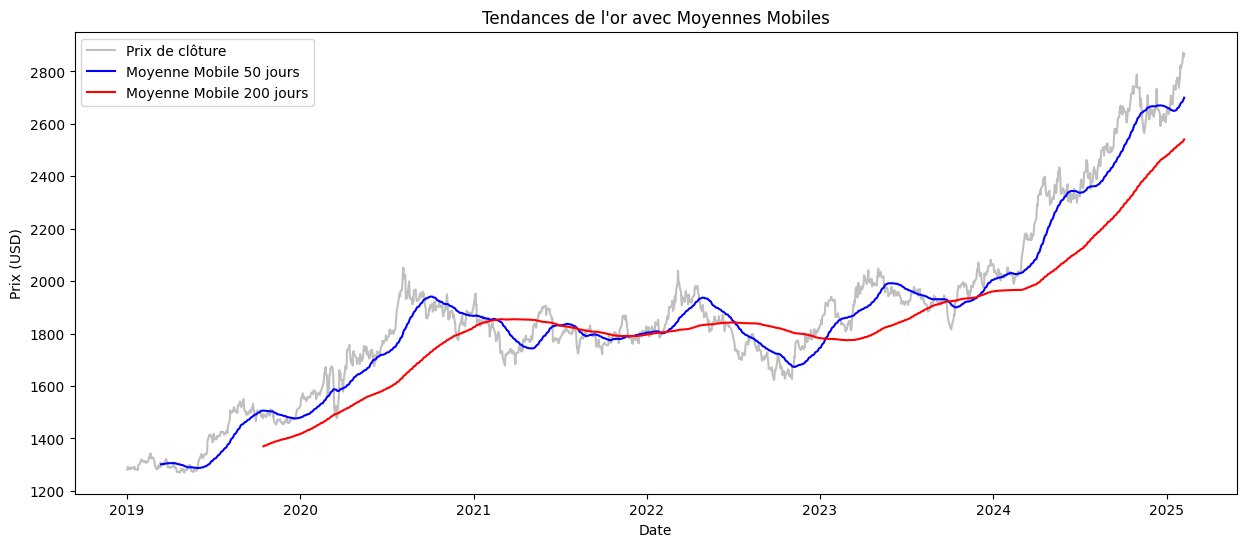

In [16]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()
plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Close"], label="Prix de clôture", color="gray", alpha=0.5)
plt.plot(df["Date"], df["SMA_50"], label="Moyenne Mobile 50 jours", color="blue")
plt.plot(df["Date"], df["SMA_200"], label="Moyenne Mobile 200 jours", color="red")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Tendances de l'or avec Moyennes Mobiles")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[
    (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
].dropna(how='all')

# Afficher les valeurs aberrantes
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Valeurs Aberrantes de l'or", dataframe=outliers)

Valeurs Aberrantes du Bitcoin


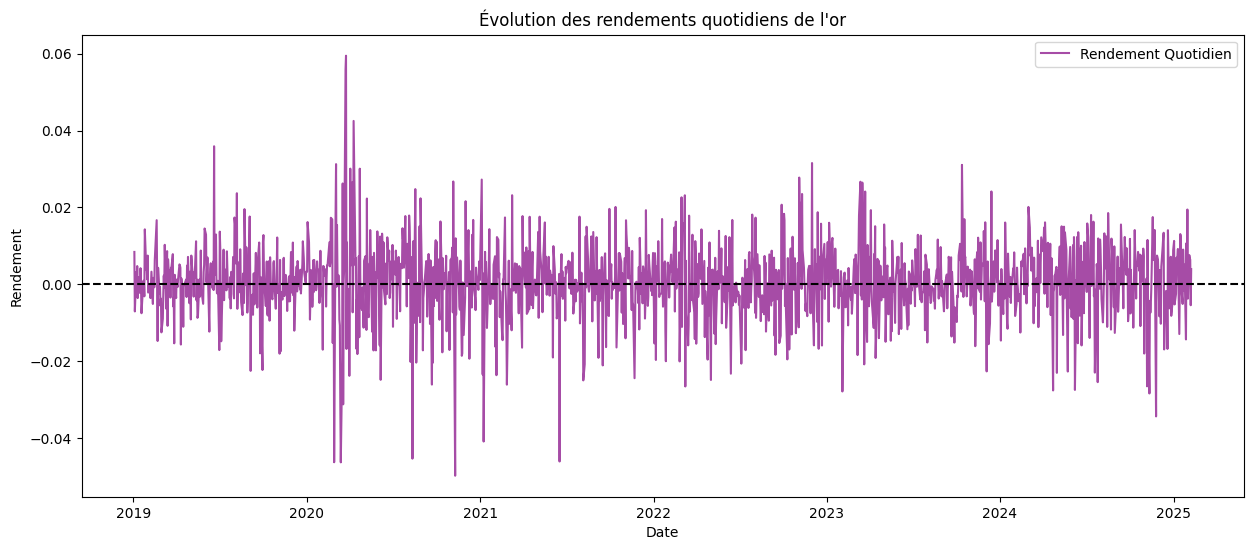

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Daily Return"], label="Rendement Quotidien", color="purple", alpha=0.7)
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.title("Évolution des rendements quotidiens de l'or")
plt.legend()
plt.show()

In [20]:
volatility = df["Daily Return"].std() * (252 ** 0.5)
print(f"Volatilité Annuelle : {volatility:.2%}")

Volatilité Annuelle : 15.53%


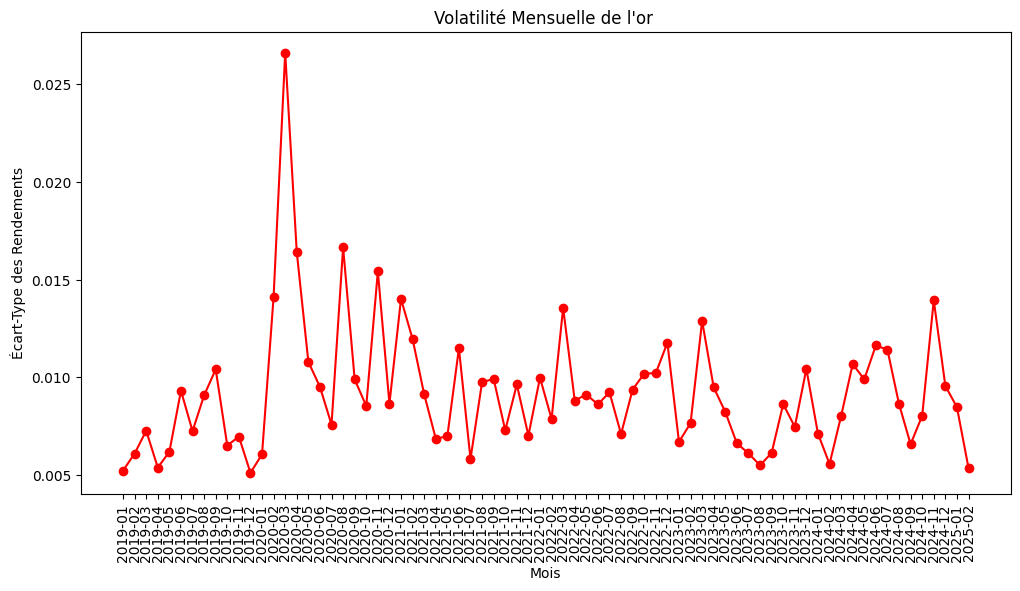

In [21]:
df["Year-Month"] = df["Date"].dt.to_period("M")
monthly_volatility = df.groupby("Year-Month")["Daily Return"].std()
plt.figure(figsize=(12, 6))
plt.plot(monthly_volatility.index.astype(str), monthly_volatility, marker='o', color="red")
plt.xticks(rotation=90)
plt.title("Volatilité Mensuelle de l'or ")
plt.xlabel("Mois")
plt.ylabel("Écart-Type des Rendements")
plt.show()